# 21BAI1061 - Mandava Pranav

In [37]:
!pip install PyWavelets

In [38]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data

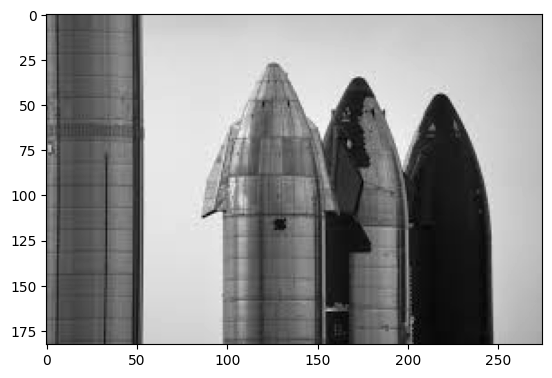

In [39]:
import cv2 as cv
john = cv.imread('starships.jpeg')
john = cv.cvtColor(john,cv.COLOR_BGR2GRAY)
plt.imshow(john,cmap='gray')

In [40]:
john_array = np.array(john)

## 2D Discrete Wavelet Transform (DWT)

In [41]:
wavelet='haar'
coeffs = pywt.wavedec2(john, wavelet, level=3)

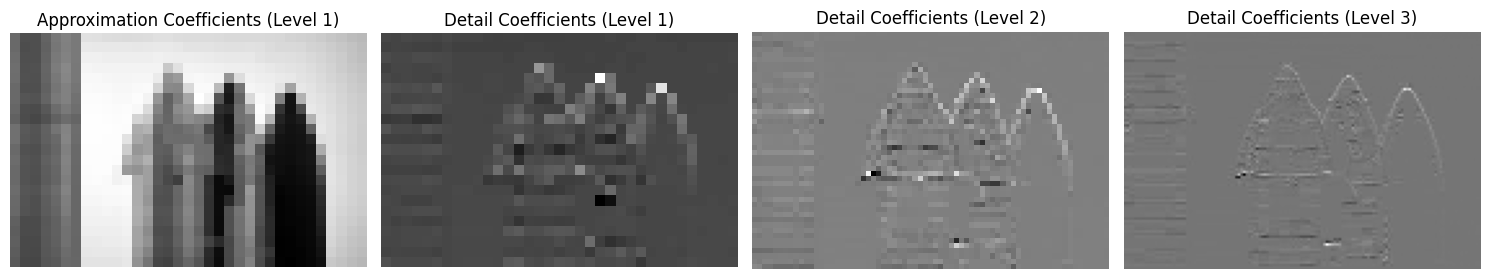

In [42]:
def plot_wavelet_coeffs(coeffs):
    approx = coeffs[0]
    details = coeffs[1:]
    num_levels = len(details)
    fig, axs = plt.subplots(1, num_levels + 1, figsize=(15, 8))

    axs[0].imshow(approx, cmap='gray')
    axs[0].set_title('Approximation Coefficients (Level 1)')
    axs[0].axis('off')

    for i in range(num_levels):
        level = i + 1
        detail_coeff = details[i][0]
        axs[level].imshow(detail_coeff, cmap='gray')
        axs[level].set_title(f'Detail Coefficients (Level {level})')
        axs[level].axis('off')

    plt.tight_layout()
    plt.show()

plot_wavelet_coeffs(coeffs)

## Image Compression Using Wavelet Coefficients


In [43]:
def compress_image(coeffs, threshold):
    compressed_coeffs = []
    for coeff in coeffs:
        if isinstance(coeff, np.ndarray):
            compressed_coeff = pywt.threshold(coeff, threshold * np.max(np.abs(coeff)), mode='soft')
            compressed_coeffs.append(compressed_coeff)
        else:
            compressed_subcoeffs = compress_image(coeff, threshold)
            compressed_coeffs.append(compressed_subcoeffs)
    return compressed_coeffs

In [44]:
compression_threshold = 0.2

In [45]:
compressed_coeffs = compress_image(coeffs, threshold=compression_threshold)

In [46]:
compressed_image = pywt.waverec2(compressed_coeffs, wavelet='haar')

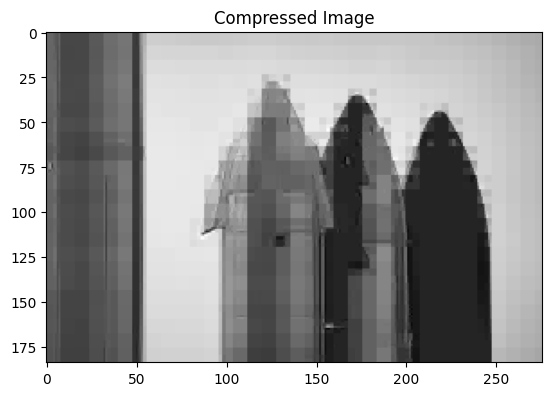

In [47]:
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.show()

## 2. Compare FFT & DWT in terms of feature extraction & Compression.


### FFT Feature Extraction

In [48]:

from scipy import fft
john = plt.imread('starships.jpeg')
image_gray = np.mean(john, axis=2)

In [49]:
fft_image = fft.fft2(image_gray)
magnitude_spectrum = np.abs(fft.fftshift(fft_image))

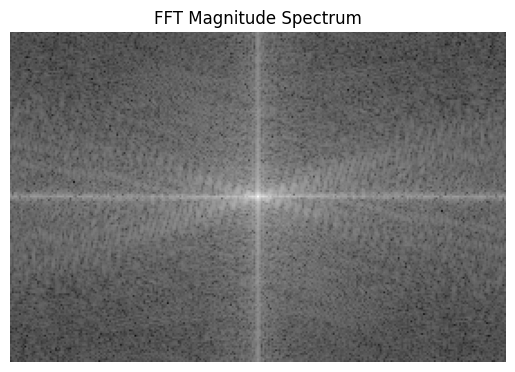

In [50]:
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.title('FFT Magnitude Spectrum')
plt.axis('off')
plt.show()

###DWT Feature Extraction:

In [51]:
import pywt
image_array = np.array(john)
coeffs = pywt.dwt2(image_array, 'haar')
cA, (cH, cV, cD) = coeffs

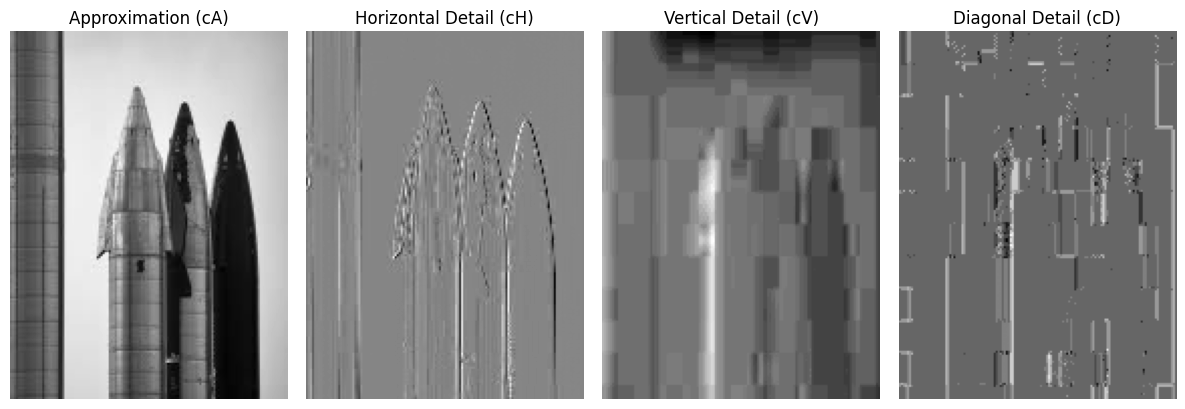

In [52]:
titles = ['Approximation (cA)', 'Horizontal Detail (cH)', 'Vertical Detail (cV)', 'Diagonal Detail (cD)']
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i, coef in enumerate([cA, cH, cV, cD]):
    coef_display = coef if len(coef.shape) == 2 else coef[:,:,0]  # Extract single channel if needed

    axes[i].imshow(coef_display, cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

###FFT Compression

In [53]:
from scipy import fftpack
fft_image = fftpack.fft2(image_gray)

In [54]:
thresh = 0.1 * np.max(np.abs(fft_image))
fft_image_thresh = fft_image * (np.abs(fft_image) > thresh)

In [55]:
compressed_image = fftpack.ifft2(fft_image_thresh).real


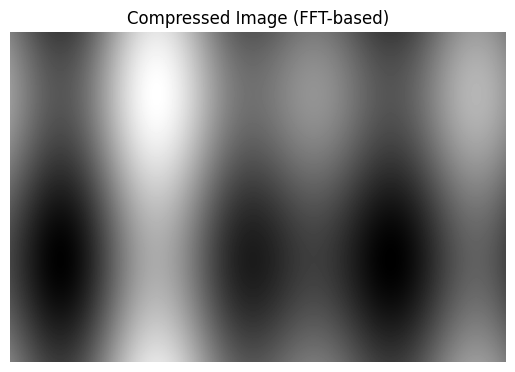

In [56]:
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (FFT-based)')
plt.axis('off')
plt.show()

###DWT Compression

In [57]:
coeffs = pywt.dwt2(image_array, 'haar')
compressed_coeffs = [pywt.threshold(c, value=0.1*np.max(c), mode='soft') for c in coeffs]
compressed_image = pywt.idwt2((compressed_coeffs[0], (compressed_coeffs[1][0], compressed_coeffs[1][1], compressed_coeffs[1][2])), 'haar')

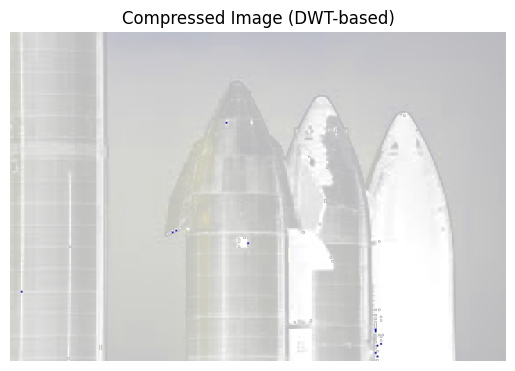

In [58]:
plt.imshow(compressed_image.astype('uint8'), cmap='gray')
plt.title('Compressed Image (DWT-based)')
plt.axis('off')
plt.show()